In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df=pd.read_csv("E:DATA Science//Datasets//Kaggle//raghu543-ipl-data-till-2017//ipldata//matches.csv")

In [8]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


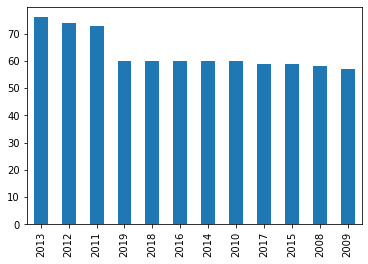

In [12]:
df['season'].value_counts().plot.bar()

In [14]:
df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [105]:
def team_win_count(team1,team2,df):
    df_cm=df.loc[((df['team1']==team1) & (df['team2']==team2)) | ((df['team2']==team1) & (df['team1']==team2))]
    df_cm.reset_index(drop=True,inplace=True)
    match_cm=df_cm.groupby('season')['winner'].value_counts().unstack().fillna(0)
    team_1=list(match_cm[team1])
    team_2=list(match_cm[team2])
    season=list(match_cm.index)
    csk_mi=pd.DataFrame()
    csk_mi[team1]=team_1
    csk_mi[team2]=team_2
    csk_mi['season']=season    
    return csk_mi

def df2stack(team1,team2,c1,c2,df):
    fig = go.Figure(data=[
    go.Bar(name=team1, x=df['season'], y=df[team1],marker_color=c1 ),
    go.Bar(name=team2, x=df['season'], y=df[team2],marker_color=c2)
    ])
    # Change the bar mode
    fig.update_layout(barmode='stack')
    fig.show()

In [106]:
csk="Chennai Super Kings"
mi="Mumbai Indians"

In [107]:
csk_mi=team_win_count(csk,mi,df)

In [108]:
df2stack('Chennai Super Kings','Mumbai Indians','#FFFF3C','#005FA2',csk_mi)

In [134]:
df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [155]:
def team2count(df,total,col):
    team_play={}
    team_name=list(df[col].unique())
#     total=list(df[team1])+list(df[team2])
    
    for i in range(len(total)):
        if total[i] not in team_play.keys():
            team_play[total[i]]=1
        else:
            team_play[total[i]]+=1 
        
    team=list(team_play.keys())
    count=list(team_play.values()) 
    df_team=pd.DataFrame(zip(team,count),columns=['team','count'])
    
    return df_team    

In [156]:
total=list(df['team1'])+list(df['team2'])
t2c=team2count(df,total,'team1')

In [158]:
total=list(df['winner'])
t2co=team2count(df,total,'winner')

In [163]:
t2co.drop([13],inplace=True)
t2co.reset_index(drop=True,inplace=True)

In [171]:
team_dict={}

In [176]:
for i in range(len(t2co)):
    k=t2co['team'][i]
    v=t2co['count'][i]
    dict1={k:v}
    team_dict.update(dict1)

In [179]:
win_team=list(t2c.team.map(team_dict))
t2c['total_win']=win_team

In [181]:
t2c

,team,count,total_win
0,Sunrisers Hyderabad,108,58
1,Mumbai Indians,187,109
2,Gujarat Lions,30,13
3,Rising Pune Supergiant,16,10
4,Royal Challengers Bangalore,180,84
5,Kolkata Knight Riders,178,92
6,Delhi Daredevils,161,67
7,Kings XI Punjab,176,82
8,Chennai Super Kings,164,100
9,Rajasthan Royals,147,75


In [183]:
t2c['win_prt']=0
for i in range(len(t2c)):
    percent=(t2c['total_win'][i]/t2c['count'][i])*100
    t2c['win_prt'][i]=percent

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:
import plotly.express as px

In [190]:
fig = px.bar(t2c, x='team', y='win_prt',
             hover_data=['count', 'total_win'],color='win_prt',
             labels={'win_prt':'winning percentage'}, height=400)
fig.show()

In [191]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [192]:
df.loc[df['toss_winner']==df['winner']]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [193]:
len(df)

756